<a href="https://colab.research.google.com/github/nana-hyun/AI_experience_lab/blob/main/Ch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/team-a/0-data/adni-fs.csv")

TA = data.filter(regex="TA$")

data_extracted= pd.merge(left=data[['diagnosis']], right=TA, left_index=True, right_index=True)
data_extracted = data_extracted.drop(data_extracted[data_extracted['diagnosis']== 'MCI'].index)
data_extracted = data_extracted.dropna()
data_extracted = data_extracted.reset_index(drop=True)  #index reset
data_extracted

,diagnosis,ST13TA,ST14TA,ST15TA,ST23TA,ST24TA,ST25TA,ST26TA,ST31TA,ST32TA,...,ST113TA,ST114TA,ST115TA,ST116TA,ST117TA,ST118TA,ST119TA,ST121TA,ST129TA,ST130TA
0,AD,2.283,2.306,2.442,1.584,1.692,2.526,2.196,2.072,2.487,...,2.673,2.010,2.420,1.891,2.320,2.278,2.701,2.327,2.451,2.547
1,CN,2.225,2.466,2.418,1.560,2.846,2.780,2.445,2.333,2.687,...,2.899,2.159,2.564,2.033,2.250,2.397,3.708,2.162,2.668,3.022
2,AD,1.725,2.847,2.207,1.764,2.015,3.013,2.211,2.222,2.196,...,3.570,2.260,2.525,1.930,2.315,2.211,2.904,2.104,2.485,2.461
3,CN,2.164,2.963,2.368,1.743,3.489,2.463,2.807,2.207,2.940,...,2.556,2.208,2.487,2.047,2.155,2.314,3.056,2.213,2.789,2.955
4,AD,2.169,2.882,2.371,1.631,3.941,2.266,2.678,2.156,2.784,...,2.610,2.082,2.567,1.949,2.298,2.334,4.070,2.319,2.734,2.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,CN,2.372,3.080,2.332,1.753,3.160,2.254,2.642,2.231,2.613,...,2.950,1.866,2.283,1.978,2.421,1.994,3.131,1.606,2.695,2.546
737,CN,2.399,3.049,2.371,2.072,3.087,2.490,2.711,2.254,2.697,...,2.992,2.037,2.523,2.178,2.749,2.438,4.373,2.266,2.972,2.951
738,CN,2.323,2.910,2.494,1.930,3.850,2.770,2.674,2.378,2.776,...,2.414,2.045,2.512,2.173,2.761,2.394,3.919,2.373,2.980,2.920
739,CN,2.330,3.316,2.486,2.078,3.576,2.793,2.965,2.392,2.894,...,2.526,2.255,2.591,2.123,2.859,2.471,3.677,2.596,2.937,3.016


In [4]:
#data shuffle

df_shuffled = data_extracted.iloc[np.random.permutation(len(data_extracted))].reset_index(drop=True)

In [5]:
# Prepare the data

X= df_shuffled.filter(regex="TA$").values
y = df_shuffled['diagnosis'].values

y[y == 'CN']= 0
y[y == 'AD'] = 1

Text(0, 0.5, 'CN/AD (0/1)')

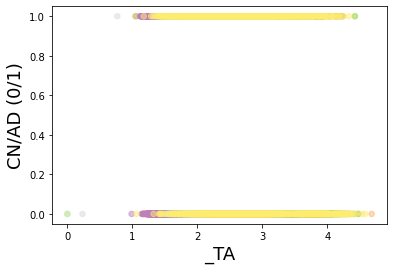

In [6]:
# draw plot

y_arr = np.array(68 * [y])

arrange =  np.array(range(68))
arrange = np.array(741 * [arrange])

plt.scatter(X.T,y_arr,c = arrange.T,alpha = 0.5, s= 30, cmap='Set3')
plt.xlabel("_TA", fontsize=18)
plt.ylabel("CN/AD (0/1)", rotation=90, fontsize=18)

In [7]:
y=y.astype('int')

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# 4강+

## Linear regression

In [9]:
X_b = np.c_[np.ones((592,1)),X_train] #np.c_ : 배열붙이기, np.ones : 배열 생성 (1로 채움)
print(X_b)

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train) #dot() : 행렬 곱셈

theta_best

[[1.    2.546 2.066 ... 1.791 2.917 3.022]
 [1.    2.163 3.025 ... 1.977 2.64  2.625]
 [1.    2.143 3.045 ... 2.749 2.769 2.845]
 ...
 [1.    2.021 2.47  ... 2.245 2.939 2.889]
 [1.    2.667 3.099 ... 1.813 3.163 3.019]
 [1.    1.808 2.703 ... 1.543 2.673 2.508]]


array([ 2.40340503e+00, -1.22621872e-01,  3.88362753e-02, -1.29665661e-02,
        4.72854986e-02, -3.07679797e-01, -1.70994830e-02,  2.40735812e-01,
       -1.27445508e-01, -2.81785148e-01, -1.94427295e-01, -4.25510623e-02,
        1.82485681e-01, -2.13810809e-01, -7.79961580e-02, -1.25610219e-01,
        1.94283099e-01, -1.56624206e-01,  1.80000932e-01,  4.63924078e-02,
        2.12333094e-01, -1.25006680e-01, -1.54120343e-01, -2.69585292e-02,
       -9.47071446e-03,  4.30818355e-02, -7.40389686e-02, -1.26709417e-01,
        1.27785505e-01,  5.17306757e-02, -1.86547681e-01, -1.88187960e-01,
        1.73511200e-01,  1.07586038e-01, -1.62278476e-02, -2.82264643e-02,
       -1.70116983e-01,  1.55936540e-01, -1.89488962e-01,  5.80504090e-02,
        6.27235266e-03, -3.15327999e-01,  7.86696082e-02, -5.77289458e-02,
        2.77525222e-02,  1.54186017e-01,  3.78942415e-01,  7.77720882e-04,
       -2.36063511e-02, -6.50172198e-02,  1.91040021e-02, -2.55157262e-01,
       -5.10993054e-02,  

<function matplotlib.pyplot.show>

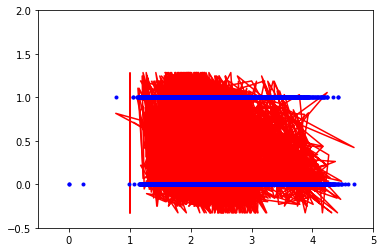

In [10]:
X_new_b = np.c_[np.ones((149,1)), X_test] # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)

plt.axis([-0.5, 5, -0.5, 2])

plt.plot(X_new_b, y_predict,"r-")
plt.plot(X, y, "b.")

plt.show

In [11]:
y_predict

array([ 0.39929044, -0.08949123,  0.42909808,  0.46528891,  0.3430338 ,
        1.0553434 ,  1.1885844 ,  0.16261405,  0.89912582, -0.04922554,
        0.25952531,  0.82805093,  0.22551061,  0.16599535,  0.02088717,
        0.74540482,  0.61532335,  0.80615889,  1.03109136,  0.02402954,
        0.80461186,  0.87965398,  0.87167404,  0.33757073, -0.32765611,
        0.21569342,  0.78750321,  0.50758389,  0.43227741,  0.07621308,
        0.90320899, -0.05310182,  1.24551862,  0.43609382,  0.81593389,
        0.05125916,  0.09945787, -0.15902356, -0.01170537,  0.25135913,
       -0.06750461,  0.12818361, -0.20010542, -0.10700165, -0.14074798,
       -0.23036671,  0.21020199,  0.91572442,  1.28493378,  0.07273489,
        0.27958926,  0.39610245,  0.94166639,  0.98473814, -0.17286766,
        0.21934682,  0.4297845 ,  0.34529857,  1.05553562,  0.56143567,
        0.10790026,  0.18124778,  0.71243239,  0.15119792,  0.0355074 ,
        0.05937409,  0.12855464,  0.00377281,  0.15293948, -0.03

<function matplotlib.pyplot.show>

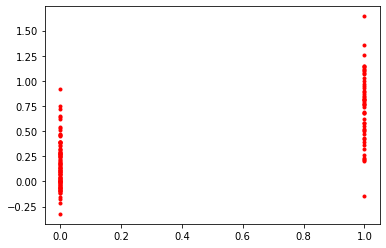

In [165]:
plt.plot(y_test, y_predict,"r.")
plt.show

In [12]:
X_train, X_test = train_test_split(X, test_size=0.2, shuffle=True, random_state=42)

# Select a linear model
lin_model = sklearn.linear_model.LinearRegression()

# Train the model
lin_model.fit(X_train,y_train)

LinearRegression()

In [194]:
lin_model.intercept_, lin_model.coef_ # 기울기 ,절편

(2.4013199039781075,
 array([-0.0999469 ,  0.00811076, -0.01311667,  0.05799191, -0.31970264,
         0.01845517,  0.22188296, -0.28406637, -0.27436248, -0.15950263,
         0.07057023,  0.047413  , -0.15656941, -0.23589944, -0.03797269,
         0.20009668, -0.1495263 ,  0.16783243,  0.14527648,  0.23551691,
        -0.21777409, -0.04994988, -0.04357524, -0.10347979,  0.08745998,
        -0.03121915, -0.32132605,  0.05665392,  0.15203784, -0.09144127,
        -0.15101325,  0.14699684,  0.12070398, -0.07961176, -0.00714148,
        -0.18716127,  0.11781073, -0.19017194,  0.08903186, -0.07219065,
        -0.36212502,  0.13757827,  0.02055102,  0.06623885,  0.26352558,
         0.19111728, -0.00233633, -0.03993945,  0.03140739,  0.08168528,
        -0.08263162, -0.17162542,  0.24605815, -0.02925831,  0.04113111,
        -0.04514728,  0.19543124, -0.27545264,  0.02777599, -0.17060136,
         0.0210159 ,  0.25831456, -0.19539644,  0.28692534, -0.08931785,
        -0.00089483,  0.198630

<function matplotlib.pyplot.show>

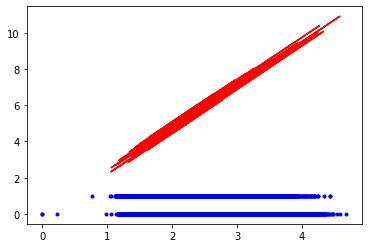

In [195]:
plt.plot(X_test, lin_model.intercept_*X_test + lin_model.coef_, "r-")
plt.plot(X, y, "b.")

plt.show

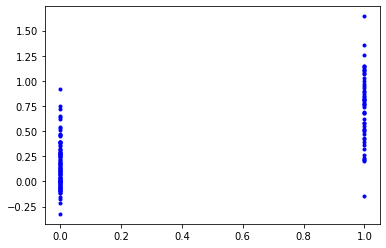

In [228]:
y_new = lin_model.predict(X_test)
plt.plot(y_test,y_new,'b.')

## SGD

In [226]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3,random_state=42, penalty = None, eta0 = 0.1)
sgd_reg.fit(X_train, y_train)

sgd_reg.intercept_, sgd_reg.coef_

(array([1.59447165e+10]),
 array([-7.93653870e+10, -1.72544435e+11,  2.09068314e+11,  7.21448124e+09,
         1.69530112e+10,  6.28170124e+10,  1.40456073e+10, -4.57953253e+10,
        -1.78423061e+11,  6.42562319e+09, -4.35021061e+10, -1.60193064e+11,
         1.46297064e+11, -4.34177124e+09, -8.58077481e+10, -6.62771056e+10,
         1.03893881e+11,  1.07545544e+11,  1.33976331e+11, -7.52951348e+10,
         8.88226685e+10,  1.40022322e+11,  1.56599352e+10,  1.39568597e+11,
        -2.82521915e+10,  5.30877104e+09,  2.69714842e+10,  2.14930326e+10,
         1.87016766e+11, -4.87085303e+10,  9.86633142e+10,  3.54730240e+10,
        -7.52652716e+10,  1.44099075e+11, -2.12016636e+11, -2.56654192e+11,
         3.58866273e+10,  8.54931683e+10,  2.08942023e+10,  3.09783749e+10,
         9.24969347e+10,  5.97136083e+09,  5.22067334e+10,  1.81123547e+11,
         1.03351314e+10, -2.67028617e+11,  1.67095079e+11,  2.53909683e+10,
         9.87782056e+10, -1.45417361e+11,  1.08857410e+11, -3.

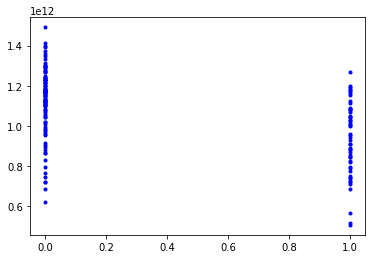

In [227]:
y_new = sgd_reg.predict(X_test)
plt.plot(y_test,y_new,'b.')

## polynomial

In [197]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

In [198]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(5.261543914785361,
 array([-0.09491607, -0.00758706, -0.13863018, ..., -0.18111937,
         0.03692118, -0.12420997]))

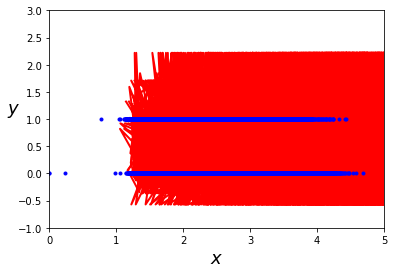

In [207]:
#X_new=np.linspace(0, 5, 68).reshape(1, 68)

X_new_poly = poly_features.transform(X_test)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X_new_poly, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, -1, 3])
plt.savefig("quadratic_predictions_plot")
plt.show()

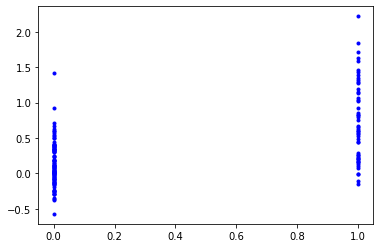

In [224]:
plt.plot(y_test,y_new,'b.')

## Logistic regression

In [219]:
from sklearn.linear_model import LogisticRegression

y_train = y_train.astype(np.int)
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

LogisticRegression(random_state=42)

In [220]:
y_proba = log_reg.predict_proba(X_test)

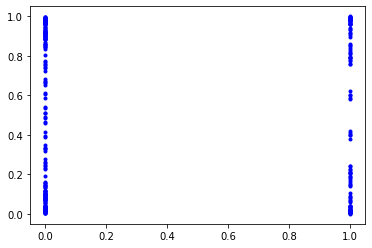

In [221]:
plt.plot(y_test,y_proba,'b.')

# 5강 Support Vector Machine

## IRIS

In [13]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [14]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X1 = iris["data"][:, (2, 3)]  # petal length, petal width
y1 = iris["target"]

setosa_or_versicolor = (y1 == 0) | (y1 == 1)
X1 = X1[setosa_or_versicolor]
y1 = y1[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))  #hard margin
svm_clf.fit(X1, y1)

SVC(C=inf, kernel='linear')

In [23]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

Saving figure large_margin_classification_plot


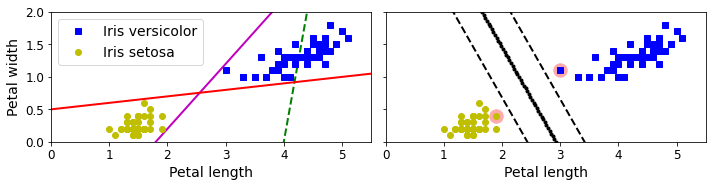

In [22]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k.", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs", label="Iris versicolor")
plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X1[:, 0][y1==1], X1[:, 1][y1==1], "bs")
plt.plot(X1[:, 0][y1==0], X1[:, 1][y1==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Saving figure sensitivity_to_feature_scales_plot


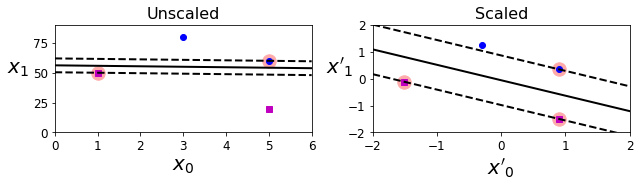

In [14]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


### Soft Margin

Saving figure sensitivity_to_outliers_plot


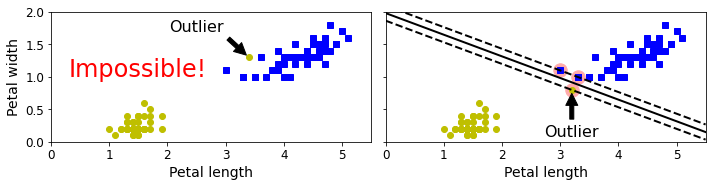

In [25]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X1, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y1, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X1, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y1, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

In [26]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X2 = iris["data"][:, (2, 3)]  # petal length, petal width
y2 = (iris["target"] == 2).astype(np.float64)  # Iris virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X2, y2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [27]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [28]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X2, y2)
scaled_svm_clf2.fit(X2, y2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [29]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y2 * 2 - 1
support_vectors_idx1 = (t * (X2.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X2.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X2[support_vectors_idx1]
svm_clf2.support_vectors_ = X2[support_vectors_idx2]

Saving figure regularization_plot


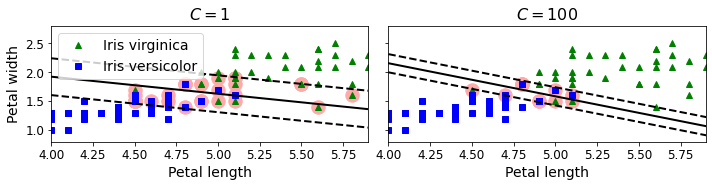

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X2[:, 0][y2==1], X2[:, 1][y2==1], "g^", label="Iris virginica")
plt.plot(X2[:, 0][y2==0], X2[:, 1][y2==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X2[:, 0][y2==1], X2[:, 1][y2==1], "g^")
plt.plot(X2[:, 0][y2==0], X2[:, 1][y2==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

## Moon Maker

Saving figure higher_dimensions_plot


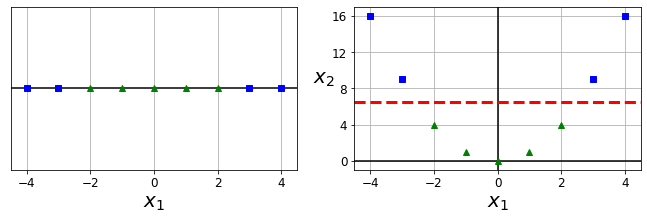

In [51]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

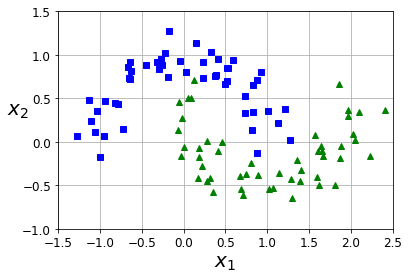

In [53]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [54]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

Saving figure moons_polynomial_svc_plot


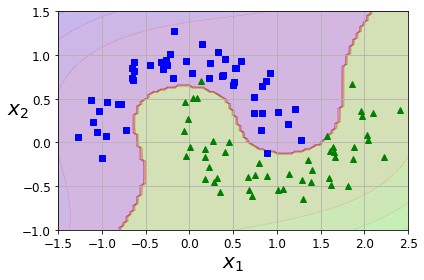

In [55]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## ADNI

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [98]:
import os
def plot_svc_decision_boundary(svm_clf,X_test):
    w = svm_clf.coef_[0]
    #b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    #x0 = np.linspace(xmin, xmax, 68)
    decision_boundary = X_test.dot(w)

    #margin = w.T
    #gutter_up = decision_boundary + margin
    #gutter_down = decision_boundary - margin

   #svs = svm_clf.support_vectors_    
   #plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(X_test, decision_boundary, "k-", alpha= 0.5, linewidth=2)
    #plt.plot(x0, gutter_up, "b--", linewidth=2)
    #plt.plot(x0, gutter_down, "r--", linewidth=2)


In [11]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [12]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))  #hard margin
svm_clf.fit(X_train, y_train)

NameError: ignored

In [16]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [17]:
svm_clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [100]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [18]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X_train, y_train)
scaled_svm_clf2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [19]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y_test * 2 - 1
support_vectors_idx1 = (t * (X_test.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X_test.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X_test[support_vectors_idx1]
svm_clf2.support_vectors_ = X_test[support_vectors_idx2]

Saving figure regularization_plot


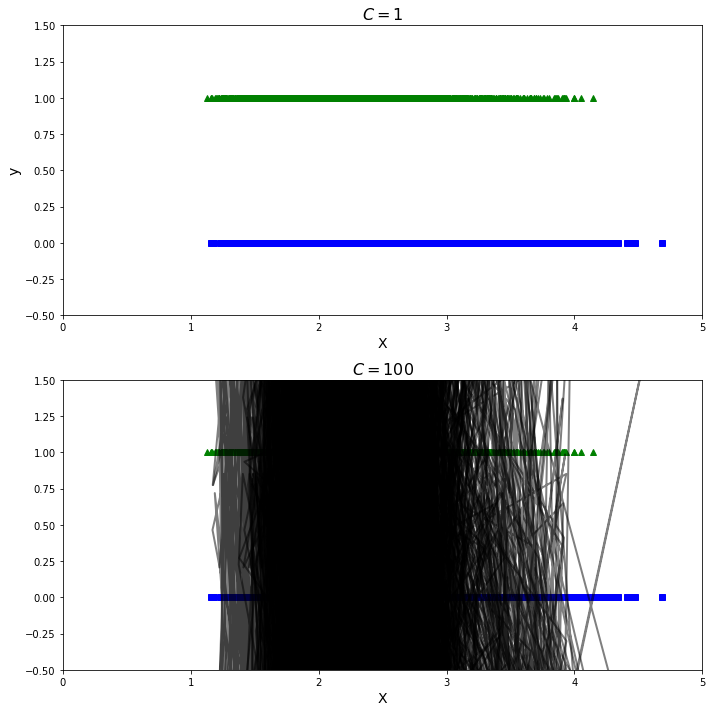

In [99]:
fig, axes = plt.subplots(nrows=2, figsize=(10,10), sharey=True)

plt.sca(axes[0])
plt.plot(X_test[y_test==0],y_test[y_test==0], "bs")
plt.plot(X_test[y_test==1],y_test[y_test==1], "g^")

plot_svc_decision_boundary(svm_clf1, X_test)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([0, 5, -0.5, 1.5])

plt.sca(axes[1])
plt.plot(X_test[y_test==0],y_test[y_test==0], "bs")
plt.plot(X_test[y_test==1],y_test[y_test==1], "g^")
plot_svc_decision_boundary(svm_clf2, X_test)
plt.xlabel("X", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([0, 5, -0.5, 1.5])

save_fig("regularization_plot")

In [21]:
svm_clf1.coef_[0]

array([-1.51047920e-01,  2.65553298e-01,  7.46596143e-01,  4.76321474e-01,
       -2.09650892e+00, -5.73190522e-01,  2.08987010e+00,  1.81620842e-01,
       -1.85267718e+00, -1.24662118e+00,  7.66210456e-01,  1.88985568e+00,
       -2.28572193e+00, -1.71731525e+00, -1.04375575e+00,  1.53303178e+00,
       -1.51986593e+00,  5.14241287e-01,  1.49845230e+00,  1.88096373e+00,
       -4.56052821e+00,  6.21289568e-01,  7.01902345e-01, -2.06929341e+00,
        3.57207416e-01, -7.44207869e-01, -1.19502088e+00,  1.61225770e+00,
        3.85406594e-01, -1.49180686e+00, -2.58971577e-01,  9.34019740e-01,
        4.90622400e-01, -9.67758666e-01, -5.14525051e-01, -2.95302016e+00,
        1.35816660e+00, -8.61781317e-01,  9.40389539e-01, -1.33206301e+00,
       -2.51057912e+00,  3.30928901e-01, -1.45813376e-01,  3.24688588e-01,
        1.31369896e+00,  2.34145337e+00,  2.22445886e-03, -7.60599102e-01,
        1.15017051e+00,  5.36701816e-01, -2.56872254e-01, -2.03567987e+00,
        4.20129981e-01,  

### validation

### nonlinear

In [22]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=1)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])